# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
uom = "metric"
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={uom}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | utrik
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | taulaga
Processing Record 4 of Set 1 | gao
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | nantucket
Processing Record 7 of Set 1 | udachny
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | buxtehude
Processing Record 11 of Set 1 | nagqu
Processing Record 12 of Set 1 | tazovsky
Processing Record 13 of Set 1 | rikaze
Processing Record 14 of Set 1 | singkil
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | jinghong
Processing Record 18 of Set 1 | qaqortoq
Processing Record 19 of Set 1 | kailua-kona
Processing Record 20 of Set 1 | xining
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | uturoa
Processing Record 23 of Set 1 | invercar

Processing Record 40 of Set 4 | yorkton
Processing Record 41 of Set 4 | kiunga
Processing Record 42 of Set 4 | jamestown
Processing Record 43 of Set 4 | akhnur
Processing Record 44 of Set 4 | guerrero negro
Processing Record 45 of Set 4 | binzhou
Processing Record 46 of Set 4 | labrador city
Processing Record 47 of Set 4 | aykhal
Processing Record 48 of Set 4 | dudinka
Processing Record 49 of Set 4 | wailua homesteads
Processing Record 0 of Set 5 | langres
Processing Record 1 of Set 5 | veraval
Processing Record 2 of Set 5 | molde
Processing Record 3 of Set 5 | kone
Processing Record 4 of Set 5 | peniche
Processing Record 5 of Set 5 | yangor
City not found. Skipping...
Processing Record 6 of Set 5 | jacmel
Processing Record 7 of Set 5 | severo-yeniseyskiy
Processing Record 8 of Set 5 | talcahuano
Processing Record 9 of Set 5 | al jabin
Processing Record 10 of Set 5 | dondo
Processing Record 11 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 12 of Set 5 | mandera
Proc

Processing Record 34 of Set 8 | pangody
Processing Record 35 of Set 8 | leticia
Processing Record 36 of Set 8 | dalandzadgad
Processing Record 37 of Set 8 | vilyuysk
Processing Record 38 of Set 8 | bouza
Processing Record 39 of Set 8 | chateau-du-loir
Processing Record 40 of Set 8 | queenstown
Processing Record 41 of Set 8 | moab
Processing Record 42 of Set 8 | askoy
Processing Record 43 of Set 8 | yeppoon
Processing Record 44 of Set 8 | necochea
Processing Record 45 of Set 8 | ternate
Processing Record 46 of Set 8 | axim
Processing Record 47 of Set 8 | ginir
Processing Record 48 of Set 8 | yeniseysk
Processing Record 49 of Set 8 | vanimo
Processing Record 0 of Set 9 | nova sintra
Processing Record 1 of Set 9 | auburn hills
Processing Record 2 of Set 9 | north bend
Processing Record 3 of Set 9 | ishim
Processing Record 4 of Set 9 | camacari
Processing Record 5 of Set 9 | tibu
Processing Record 6 of Set 9 | sambava
Processing Record 7 of Set 9 | conception bay south
Processing Record 8 

Processing Record 22 of Set 12 | alagon
Processing Record 23 of Set 12 | cuilapan de guerrero
Processing Record 24 of Set 12 | muromtsevo
Processing Record 25 of Set 12 | ceeldheer
Processing Record 26 of Set 12 | maun
Processing Record 27 of Set 12 | crane
Processing Record 28 of Set 12 | homer
Processing Record 29 of Set 12 | tchintabaraden
Processing Record 30 of Set 12 | sabang
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,utrik,11.2278,169.8474,27.04,79,59,5.29,MH,1710930612
1,hermanus,-34.4187,19.2345,27.67,49,27,5.70,ZA,1710930614
2,taulaga,-11.0553,-171.0883,29.39,75,53,4.88,AS,1710930615
3,gao,16.6362,1.6370,32.85,6,0,6.03,ML,1710930617
4,puerto natales,-51.7236,-72.4875,-0.23,90,57,2.38,CL,1710930618


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")


In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,27.04,79,59,5.29,MH,1710930612
1,hermanus,-34.4187,19.2345,27.67,49,27,5.70,ZA,1710930614
2,taulaga,-11.0553,-171.0883,29.39,75,53,4.88,AS,1710930615
3,gao,16.6362,1.6370,32.85,6,0,6.03,ML,1710930617
4,puerto natales,-51.7236,-72.4875,-0.23,90,57,2.38,CL,1710930618


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

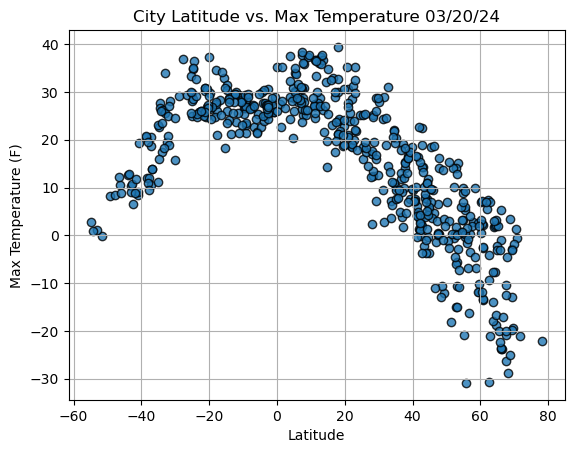

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],
            city_data_df['Max Temp'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

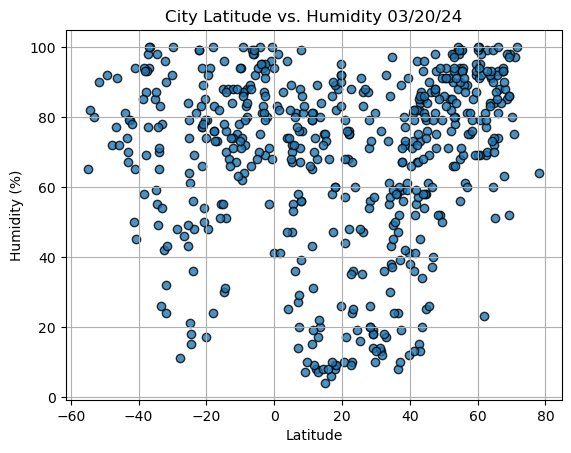

In [21]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],
            city_data_df['Humidity'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

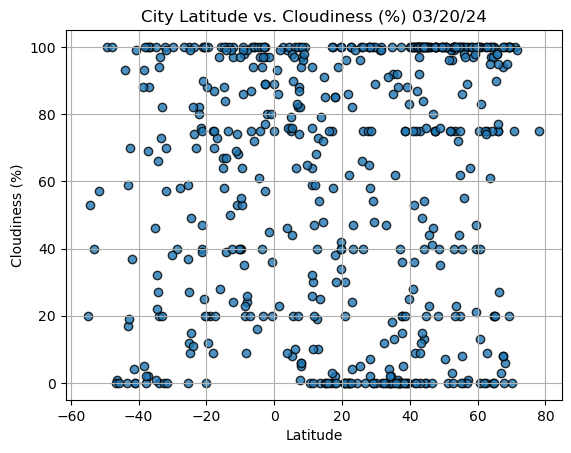

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],
            city_data_df['Cloudiness'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

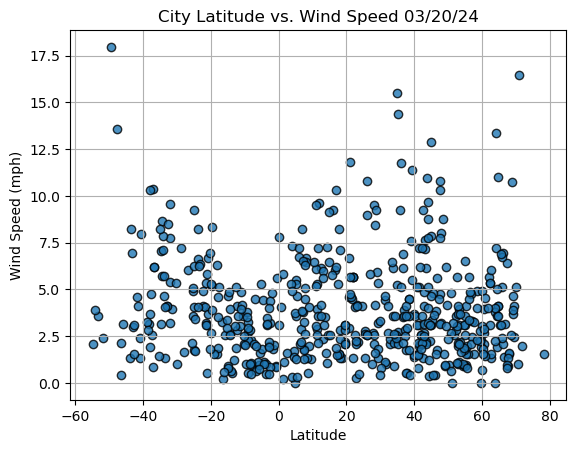

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],
            city_data_df['Wind Speed'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,utrik,11.2278,169.8474,27.04,79,59,5.29,MH,1710930612
3,gao,16.6362,1.6370,32.85,6,0,6.03,ML,1710930617
5,nantucket,41.2835,-70.0995,6.08,82,100,5.14,US,1710930620
6,udachny,66.4167,112.4000,-23.91,88,27,1.37,RU,1710930621
9,buxtehude,53.4500,9.7000,15.09,78,100,2.18,DE,1710930626


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,27.67,49,27,5.70,ZA,1710930614
2,taulaga,-11.0553,-171.0883,29.39,75,53,4.88,AS,1710930615
4,puerto natales,-51.7236,-72.4875,-0.23,90,57,2.38,CL,1710930618
7,avarua,-21.2078,-159.7750,26.03,94,40,0.51,CK,1710930572
8,waitangi,-43.9535,-176.5597,12.68,81,93,1.34,NZ,1710930625


###  Temperature vs. Latitude Linear Regression Plot

In [31]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

NameError: name 'st' is not defined

In [32]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

NameError: name 'st' is not defined

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


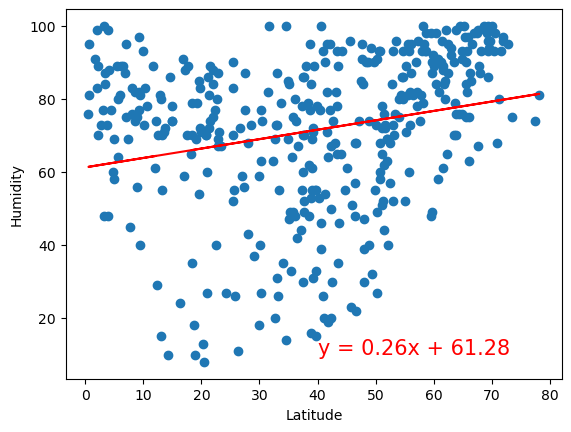

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


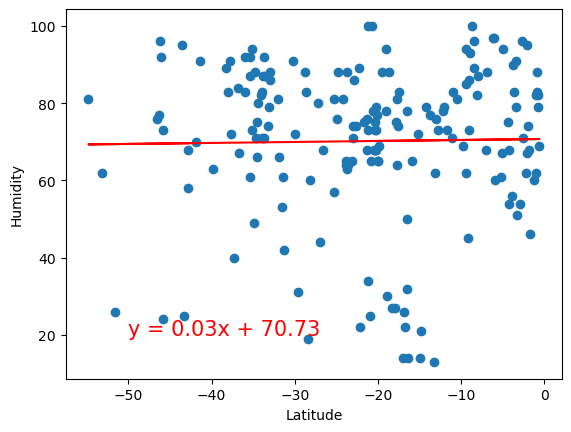

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


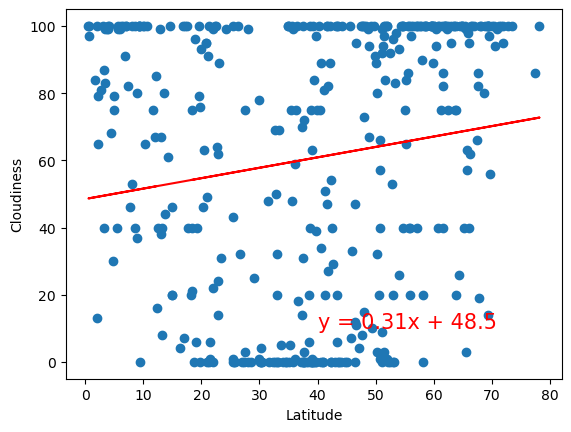

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


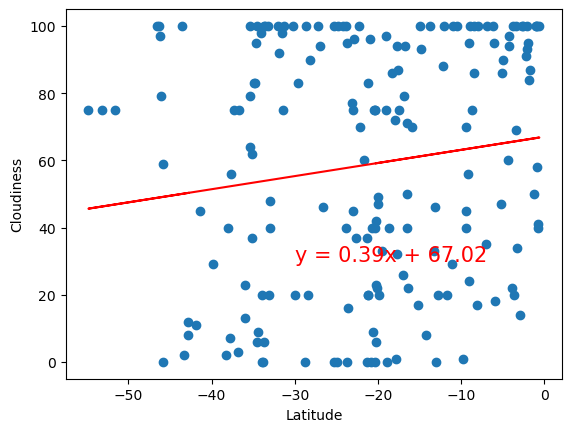

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


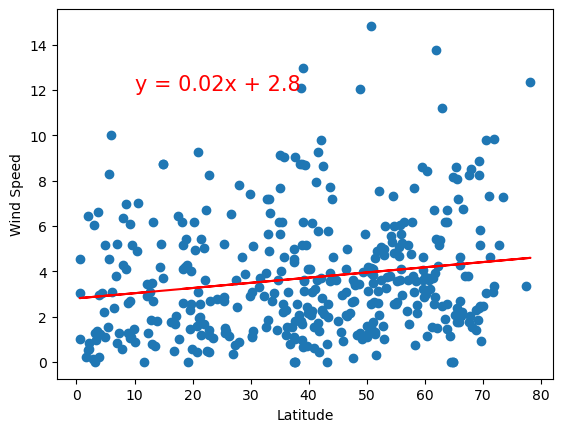

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


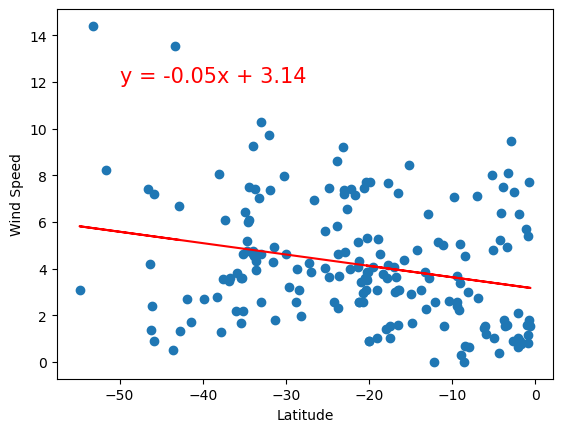

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE